# Import Needed Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

import warnings
warnings.filterwarnings('ignore')

# Read Data And Get Info

In [2]:
job = pd.read_csv('/kaggle/input/ai-powered-job-market-insights/ai_job_market_insights.csv')
job.head(10)

,Job_Title,Industry,Company_Size,Location,AI_Adoption_Level,Automation_Risk,Required_Skills,Salary_USD,Remote_Friendly,Job_Growth_Projection
0,Cybersecurity Analyst,Entertainment,Small,Dubai,Medium,High,UX/UI Design,111392.165243,Yes,Growth
1,Marketing Specialist,Technology,Large,Singapore,Medium,High,Marketing,93792.562466,No,Decline
2,AI Researcher,Technology,Large,Singapore,Medium,High,UX/UI Design,107170.263069,Yes,Growth
3,Sales Manager,Retail,Small,Berlin,Low,High,Project Management,93027.953758,No,Growth
4,Cybersecurity Analyst,Entertainment,Small,Tokyo,Low,Low,JavaScript,87752.922171,Yes,Decline
5,UX Designer,Education,Large,San Francisco,Medium,Medium,Cybersecurity,102825.007867,No,Growth
6,HR Manager,Finance,Medium,Singapore,Low,High,Sales,102065.720673,Yes,Growth
7,Cybersecurity Analyst,Technology,Small,Dubai,Medium,Low,Machine Learning,86607.317618,Yes,Decline
8,AI Researcher,Retail,Large,London,High,Low,JavaScript,75015.860846,No,Stable
9,Sales Manager,Entertainment,Medium,Singapore,High,Low,Cybersecurity,96834.578295,Yes,Decline


In [3]:
job.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Job_Title              500 non-null    object 
 1   Industry               500 non-null    object 
 2   Company_Size           500 non-null    object 
 3   Location               500 non-null    object 
 4   AI_Adoption_Level      500 non-null    object 
 5   Automation_Risk        500 non-null    object 
 6   Required_Skills        500 non-null    object 
 7   Salary_USD             500 non-null    float64
 8   Remote_Friendly        500 non-null    object 
 9   Job_Growth_Projection  500 non-null    object 
dtypes: float64(1), object(9)
memory usage: 39.2+ KB


In [4]:
job.columns.tolist()

['Job_Title',
 'Industry',
 'Company_Size',
 'Location',
 'AI_Adoption_Level',
 'Automation_Risk',
 'Required_Skills',
 'Salary_USD',
 'Remote_Friendly',
 'Job_Growth_Projection']

In [5]:
job.describe()

,Salary_USD
count,500.000000
mean,91222.390974
std,20504.291453
min,31969.526346
25%,78511.514863
50%,91998.195286
75%,103971.282092
max,155209.821614


In [6]:
print(f"Dataset rows = {job.shape[0]}")
print(f"Dataset rcolumns = {job.shape[1]}")

Dataset rows = 500
Dataset rcolumns = 10


In [7]:
job.duplicated().sum()

0

# Job_Title

In [8]:
print(f"Number of jobs : {len(job.Job_Title.unique())}")

Number of jobs : 10


In [9]:
job.Job_Title.value_counts()

Job_Title
Data Scientist           62
HR Manager               57
Cybersecurity Analyst    55
UX Designer              54
AI Researcher            51
Sales Manager            49
Marketing Specialist     48
Operations Manager       44
Software Engineer        41
Product Manager          39
Name: count, dtype: int64

In [10]:
iplot(px.bar(job.Job_Title.value_counts() , text_auto=True))

# Industry

In [11]:
print(f"Number of industries = {len(job.Industry.unique())}")

Number of industries = 10


In [12]:
job.Industry.value_counts()

Industry
Manufacturing         58
Education             57
Technology            56
Telecommunications    53
Finance               53
Energy                49
Entertainment         47
Retail                46
Healthcare            42
Transportation        39
Name: count, dtype: int64

In [13]:
iplot(px.bar(job.Industry.value_counts() , text_auto=True))

# Company_Size	

In [14]:
job.Company_Size.value_counts()

Company_Size
Small     171
Large     166
Medium    163
Name: count, dtype: int64

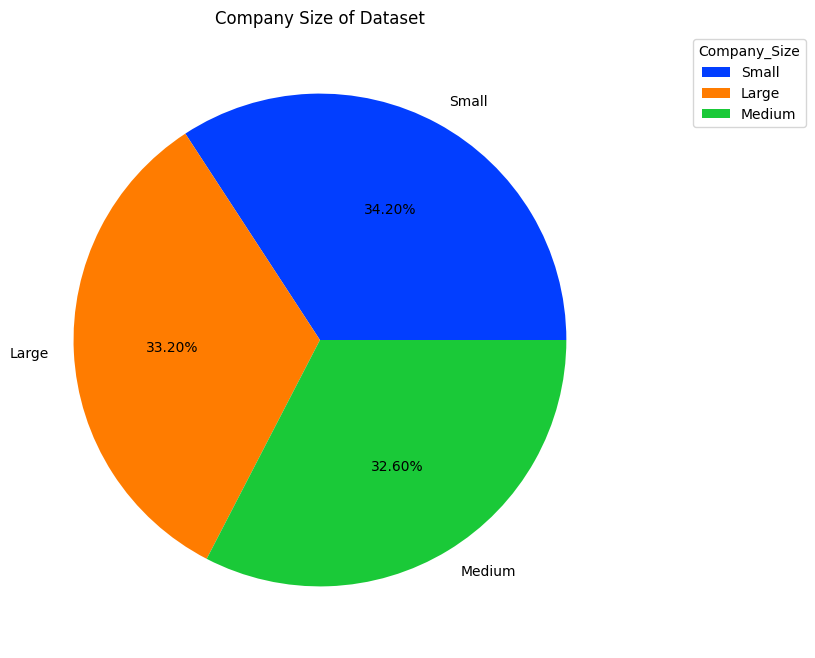

In [15]:
plt.figure(figsize = (10,8))
color_palette = sns.color_palette('bright')
plt.pie(job.Company_Size.value_counts() ,
        labels = job.Company_Size.value_counts().index ,
        autopct = '%0.2f%%',
        colors = color_palette)
plt.title('Company Size of Dataset')
plt.legend(title='Company_Size' , bbox_to_anchor=(1.3,1))
plt.show()

# Location

In [16]:
job.Location.value_counts()

Location
San Francisco    62
Singapore        54
Sydney           52
Dubai            51
Tokyo            51
New York         49
Berlin           48
London           46
Paris            46
Toronto          41
Name: count, dtype: int64

# Job_Title & Industry

In [17]:
cross_job_title_industry = pd.crosstab(job.Job_Title , job.Industry)
cross_job_title_industry

Industry,Education,Energy,Entertainment,Finance,Healthcare,Manufacturing,Retail,Technology,Telecommunications,Transportation
Job_Title,,,,,,,,,,
AI Researcher,7,5,3,7,2,6,6,6,2,7
Cybersecurity Analyst,7,5,8,2,8,6,3,6,7,3
Data Scientist,8,5,8,4,3,6,3,10,10,5
HR Manager,6,7,6,11,2,6,6,5,6,2
Marketing Specialist,4,6,3,6,5,6,9,5,3,1
Operations Manager,4,5,6,4,6,3,1,8,3,4
Product Manager,5,4,3,7,3,3,1,4,5,4
Sales Manager,4,5,3,6,4,9,5,3,5,5
Software Engineer,2,1,3,3,4,6,5,5,7,5


what The 5 most in-demand jobs in every industry ?

In [18]:
for industry in cross_job_title_industry.columns.tolist():
    print(f"The 5 most in-demand jobs in ({industry}) : ")
    print(cross_job_title_industry[industry].nlargest())
    iplot(px.bar(cross_job_title_industry[industry].nlargest() , text_auto=True))

The 5 most in-demand jobs in (Education) : 
Job_Title
UX Designer              10
Data Scientist            8
AI Researcher             7
Cybersecurity Analyst     7
HR Manager                6
Name: Education, dtype: int64


The 5 most in-demand jobs in (Energy) : 
Job_Title
HR Manager               7
Marketing Specialist     6
UX Designer              6
AI Researcher            5
Cybersecurity Analyst    5
Name: Energy, dtype: int64


The 5 most in-demand jobs in (Entertainment) : 
Job_Title
Cybersecurity Analyst    8
Data Scientist           8
HR Manager               6
Operations Manager       6
UX Designer              4
Name: Entertainment, dtype: int64


The 5 most in-demand jobs in (Finance) : 
Job_Title
HR Manager              11
AI Researcher            7
Product Manager          7
Marketing Specialist     6
Sales Manager            6
Name: Finance, dtype: int64


The 5 most in-demand jobs in (Healthcare) : 
Job_Title
Cybersecurity Analyst    8
Operations Manager       6
Marketing Specialist     5
UX Designer              5
Sales Manager            4
Name: Healthcare, dtype: int64


The 5 most in-demand jobs in (Manufacturing) : 
Job_Title
Sales Manager            9
UX Designer              7
AI Researcher            6
Cybersecurity Analyst    6
Data Scientist           6
Name: Manufacturing, dtype: int64


The 5 most in-demand jobs in (Retail) : 
Job_Title
Marketing Specialist    9
UX Designer             7
AI Researcher           6
HR Manager              6
Sales Manager           5
Name: Retail, dtype: int64


The 5 most in-demand jobs in (Technology) : 
Job_Title
Data Scientist           10
Operations Manager        8
AI Researcher             6
Cybersecurity Analyst     6
HR Manager                5
Name: Technology, dtype: int64


The 5 most in-demand jobs in (Telecommunications) : 
Job_Title
Data Scientist           10
Cybersecurity Analyst     7
Software Engineer         7
HR Manager                6
Product Manager           5
Name: Telecommunications, dtype: int64


The 5 most in-demand jobs in (Transportation) : 
Job_Title
AI Researcher         7
Data Scientist        5
Sales Manager         5
Software Engineer     5
Operations Manager    4
Name: Transportation, dtype: int64


what the 5 industries most in demand for each job ?

In [19]:
for job_name in cross_job_title_industry.index.tolist():
    print(f"The 5 industries most in demand for ({job_name}) : ")
    print(cross_job_title_industry.loc[job_name].nlargest())
    iplot(px.bar(cross_job_title_industry.loc[job_name].nlargest() , text_auto=True))

The 5 industries most in demand for (AI Researcher) : 
Industry
Education         7
Finance           7
Transportation    7
Manufacturing     6
Retail            6
Name: AI Researcher, dtype: int64


The 5 industries most in demand for (Cybersecurity Analyst) : 
Industry
Entertainment         8
Healthcare            8
Education             7
Telecommunications    7
Manufacturing         6
Name: Cybersecurity Analyst, dtype: int64


The 5 industries most in demand for (Data Scientist) : 
Industry
Technology            10
Telecommunications    10
Education              8
Entertainment          8
Manufacturing          6
Name: Data Scientist, dtype: int64


The 5 industries most in demand for (HR Manager) : 
Industry
Finance          11
Energy            7
Education         6
Entertainment     6
Manufacturing     6
Name: HR Manager, dtype: int64


The 5 industries most in demand for (Marketing Specialist) : 
Industry
Retail           9
Energy           6
Finance          6
Manufacturing    6
Healthcare       5
Name: Marketing Specialist, dtype: int64


The 5 industries most in demand for (Operations Manager) : 
Industry
Technology       8
Entertainment    6
Healthcare       6
Energy           5
Education        4
Name: Operations Manager, dtype: int64


The 5 industries most in demand for (Product Manager) : 
Industry
Finance               7
Education             5
Telecommunications    5
Energy                4
Technology            4
Name: Product Manager, dtype: int64


The 5 industries most in demand for (Sales Manager) : 
Industry
Manufacturing         9
Finance               6
Energy                5
Retail                5
Telecommunications    5
Name: Sales Manager, dtype: int64


The 5 industries most in demand for (Software Engineer) : 
Industry
Telecommunications    7
Manufacturing         6
Retail                5
Technology            5
Transportation        5
Name: Software Engineer, dtype: int64


The 5 industries most in demand for (UX Designer) : 
Industry
Education        10
Manufacturing     7
Retail            7
Energy            6
Healthcare        5
Name: UX Designer, dtype: int64


# Job_Title & Industry & Company_Size

In [20]:
industry_company_size_group = job.groupby(['Industry' , 'Company_Size'])
for industry in job.Industry.unique():
    for size in job.Company_Size.unique():
        print(f"({industry}) when ({size}) most 5 jobs in-demand :")
        print(industry_company_size_group.get_group((industry , size))['Job_Title'].value_counts().nlargest().index.tolist())
        print('----------------------------')
    
    print('\n***************************************************************')

(Entertainment) when (Small) most 5 jobs in-demand :
['Data Scientist', 'Cybersecurity Analyst', 'Operations Manager', 'AI Researcher', 'UX Designer']
----------------------------
(Entertainment) when (Large) most 5 jobs in-demand :
['HR Manager', 'Cybersecurity Analyst', 'Data Scientist', 'UX Designer', 'Product Manager']
----------------------------
(Entertainment) when (Medium) most 5 jobs in-demand :
['Data Scientist', 'Operations Manager', 'Cybersecurity Analyst', 'Marketing Specialist', 'Sales Manager']
----------------------------

***************************************************************
(Technology) when (Small) most 5 jobs in-demand :
['Operations Manager', 'Data Scientist', 'Cybersecurity Analyst', 'Product Manager', 'Software Engineer']
----------------------------
(Technology) when (Large) most 5 jobs in-demand :
['Data Scientist', 'AI Researcher', 'HR Manager', 'Software Engineer', 'Sales Manager']
----------------------------
(Technology) when (Medium) most 5 jobs 

# Job_Title & Location

In [21]:
cross_job_title_location = pd.crosstab(job.Job_Title , job.Location)
cross_job_title_location

Location,Berlin,Dubai,London,New York,Paris,San Francisco,Singapore,Sydney,Tokyo,Toronto
Job_Title,,,,,,,,,,
AI Researcher,2,3,3,6,2,10,8,5,5,7
Cybersecurity Analyst,7,9,8,6,4,4,3,7,3,4
Data Scientist,7,6,5,8,4,6,5,8,8,5
HR Manager,5,4,8,6,8,7,6,3,5,5
Marketing Specialist,6,5,4,2,6,9,6,3,6,1
Operations Manager,7,6,5,4,2,7,4,4,4,1
Product Manager,4,2,3,2,4,6,3,5,5,5
Sales Manager,5,3,6,3,5,5,7,5,3,7
Software Engineer,2,5,3,5,4,3,6,6,5,2


The most in-demand places for each job

In [22]:
for location in cross_job_title_location.columns.tolist():
    print(f"The most in-demand places for ({location}) : ")
    print(cross_job_title_location[location].nlargest())
    iplot(px.bar(cross_job_title_location[location].nlargest() , text_auto=True))

The most in-demand places for (Berlin) : 
Job_Title
Cybersecurity Analyst    7
Data Scientist           7
Operations Manager       7
Marketing Specialist     6
HR Manager               5
Name: Berlin, dtype: int64


The most in-demand places for (Dubai) : 
Job_Title
Cybersecurity Analyst    9
UX Designer              8
Data Scientist           6
Operations Manager       6
Marketing Specialist     5
Name: Dubai, dtype: int64


The most in-demand places for (London) : 
Job_Title
Cybersecurity Analyst    8
HR Manager               8
Sales Manager            6
Data Scientist           5
Operations Manager       5
Name: London, dtype: int64


The most in-demand places for (New York) : 
Job_Title
Data Scientist           8
UX Designer              7
AI Researcher            6
Cybersecurity Analyst    6
HR Manager               6
Name: New York, dtype: int64


The most in-demand places for (Paris) : 
Job_Title
HR Manager               8
UX Designer              7
Marketing Specialist     6
Sales Manager            5
Cybersecurity Analyst    4
Name: Paris, dtype: int64


The most in-demand places for (San Francisco) : 
Job_Title
AI Researcher           10
Marketing Specialist     9
HR Manager               7
Operations Manager       7
Data Scientist           6
Name: San Francisco, dtype: int64


The most in-demand places for (Singapore) : 
Job_Title
AI Researcher           8
Sales Manager           7
HR Manager              6
Marketing Specialist    6
Software Engineer       6
Name: Singapore, dtype: int64


The most in-demand places for (Sydney) : 
Job_Title
Data Scientist           8
Cybersecurity Analyst    7
Software Engineer        6
UX Designer              6
AI Researcher            5
Name: Sydney, dtype: int64


The most in-demand places for (Tokyo) : 
Job_Title
Data Scientist          8
UX Designer             7
Marketing Specialist    6
AI Researcher           5
HR Manager              5
Name: Tokyo, dtype: int64


The most in-demand places for (Toronto) : 
Job_Title
AI Researcher      7
Sales Manager      7
Data Scientist     5
HR Manager         5
Product Manager    5
Name: Toronto, dtype: int64


In [23]:
for job_name in cross_job_title_location.index.tolist():
    print(f"The most in-demand job for ({job_name}) : ")
    print(cross_job_title_location.loc[job_name].nlargest())
    iplot(px.bar(cross_job_title_location.loc[job_name].nlargest() , text_auto=True))

The most in-demand job for (AI Researcher) : 
Location
San Francisco    10
Singapore         8
Toronto           7
New York          6
Sydney            5
Name: AI Researcher, dtype: int64


The most in-demand job for (Cybersecurity Analyst) : 
Location
Dubai       9
London      8
Berlin      7
Sydney      7
New York    6
Name: Cybersecurity Analyst, dtype: int64


The most in-demand job for (Data Scientist) : 
Location
New York    8
Sydney      8
Tokyo       8
Berlin      7
Dubai       6
Name: Data Scientist, dtype: int64


The most in-demand job for (HR Manager) : 
Location
London           8
Paris            8
San Francisco    7
New York         6
Singapore        6
Name: HR Manager, dtype: int64


The most in-demand job for (Marketing Specialist) : 
Location
San Francisco    9
Berlin           6
Paris            6
Singapore        6
Tokyo            6
Name: Marketing Specialist, dtype: int64


The most in-demand job for (Operations Manager) : 
Location
Berlin           7
San Francisco    7
Dubai            6
London           5
New York         4
Name: Operations Manager, dtype: int64


The most in-demand job for (Product Manager) : 
Location
San Francisco    6
Sydney           5
Tokyo            5
Toronto          5
Berlin           4
Name: Product Manager, dtype: int64


The most in-demand job for (Sales Manager) : 
Location
Singapore    7
Toronto      7
London       6
Berlin       5
Paris        5
Name: Sales Manager, dtype: int64


The most in-demand job for (Software Engineer) : 
Location
Singapore    6
Sydney       6
Dubai        5
New York     5
Tokyo        5
Name: Software Engineer, dtype: int64


The most in-demand job for (UX Designer) : 
Location
Dubai        8
New York     7
Paris        7
Tokyo        7
Singapore    6
Name: UX Designer, dtype: int64


# Job_Title & Required_Skills

what is skills required for each job ?

In [24]:
job_title_group = job.groupby('Job_Title')
for job_name in job.Job_Title.unique():
    print(f"Skills required for *({job_name})* is : ")
    print(f"{job_title_group.get_group(job_name)['Required_Skills'].unique().tolist()}\n")
    print('-----------------------------------------------------------------------------')

Skills required for *(Cybersecurity Analyst)* is : 
['UX/UI Design', 'JavaScript', 'Machine Learning', 'Marketing', 'Project Management', 'Cybersecurity', 'Sales', 'Python', 'Communication', 'Data Analysis']

-----------------------------------------------------------------------------
Skills required for *(Marketing Specialist)* is : 
['Marketing', 'Python', 'Machine Learning', 'UX/UI Design', 'JavaScript', 'Sales', 'Project Management', 'Cybersecurity', 'Communication', 'Data Analysis']

-----------------------------------------------------------------------------
Skills required for *(AI Researcher)* is : 
['UX/UI Design', 'JavaScript', 'Python', 'Project Management', 'Marketing', 'Communication', 'Sales', 'Machine Learning', 'Cybersecurity', 'Data Analysis']

-----------------------------------------------------------------------------
Skills required for *(Sales Manager)* is : 
['Project Management', 'Cybersecurity', 'UX/UI Design', 'JavaScript', 'Machine Learning', 'Data Analysis

# Job_Title & Salary_USD

<Axes: xlabel='Salary_USD', ylabel='Count'>

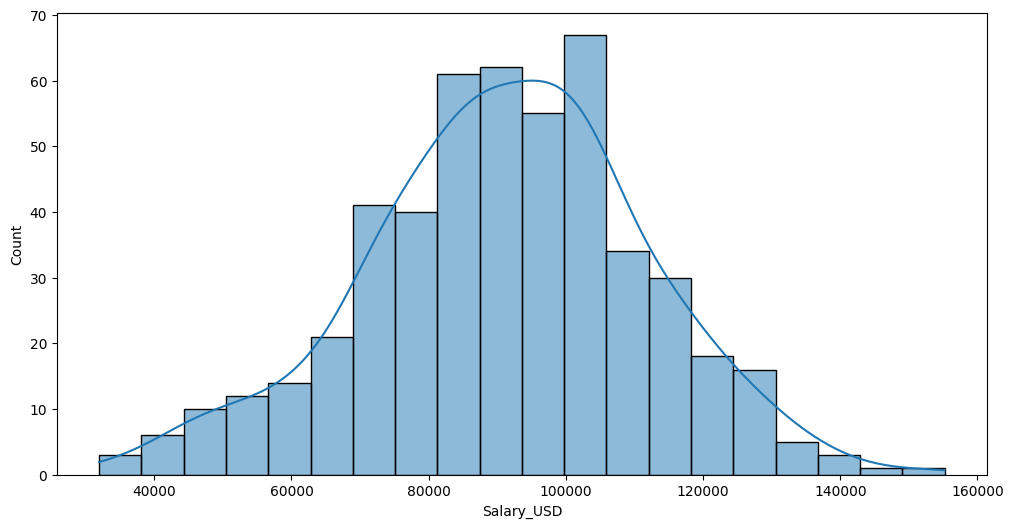

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(job.Salary_USD , kde=True)

In [26]:
job_title_group.Salary_USD.describe()[['mean' , 'min' , 'max']].T.sort_values(by=['mean'] , axis=1 , ascending=False)

Job_Title,Operations Manager,AI Researcher,Sales Manager,Data Scientist,Marketing Specialist,Product Manager,UX Designer,Cybersecurity Analyst,HR Manager,Software Engineer
mean,96937.230841,95583.346966,92926.644659,91480.756134,90961.147148,90802.642422,90157.291938,89429.064689,89251.780747,84490.542038
min,41810.513576,67469.063754,55906.059730,31969.526346,43343.243990,41298.726205,35963.297317,33601.381360,46867.986067,45186.524272
max,139078.066919,126266.824105,134822.691380,148467.112346,155209.821614,133106.654964,140475.995812,135566.660583,135778.949794,138448.110776


# Job_Title & Salary_USD & Location

what is Salary_USD in each place ?

In [27]:
job_title_location_group = job.groupby(['Location' , 'Job_Title'])
for location in job.Location.unique():
    for job_name in job.Job_Title.unique():
        print(f"Salary_USD in ({location}) for ({job_name})")
        print(job_title_location_group.get_group((location,job_name)).Salary_USD.describe()[['mean' , 'min' , 'max']])
        print('-------------------------------\n')
    print('****************************************************\n****************************************************')

Salary_USD in (Dubai) for (Cybersecurity Analyst)
mean     89324.862055
min      51676.656407
max     111392.165243
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Dubai) for (Marketing Specialist)
mean     87012.482741
min      50286.756872
max     109663.044218
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Dubai) for (AI Researcher)
mean     96047.839838
min      67469.063754
max     126266.824105
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Dubai) for (Sales Manager)
mean     85412.358486
min      70845.835022
max     102591.882728
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Dubai) for (UX Designer)
mean     96664.851774
min      58580.132887
max     123992.648333
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Dubai) for (HR Manager)
mean     90153.398206
min      56461.830521
max     116994.790591
Name: Salary

# Job_Title & Remote_Friendly

In [28]:
cross_job_title_remote = pd.crosstab(job.Remote_Friendly , job.Job_Title)
cross_job_title_remote

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Remote_Friendly,,,,,,,,,,
No,33,21,28,23,23,25,18,19,24,35
Yes,18,34,34,34,25,19,21,30,17,19


what is most jobs have Remote_Friendly ?

In [29]:
print('most jobs have Remote_Friendly : ')
print(cross_job_title_remote.loc['Yes'].nlargest(5))

most jobs have Remote_Friendly : 
Job_Title
Cybersecurity Analyst    34
Data Scientist           34
HR Manager               34
Sales Manager            30
Marketing Specialist     25
Name: Yes, dtype: int64


what is jobs that have Remote_Friendly or verse ?

In [30]:
for job_name in cross_job_title_remote.columns:
    if cross_job_title_remote[job_name].loc['Yes'] > cross_job_title_remote[job_name].loc['No']:
        print(f"{job_name} ---> (Remote Frindely)")
    else:
        print(f"{job_name} ---> (Not On-Site Frindely)")

AI Researcher ---> (Not On-Site Frindely)
Cybersecurity Analyst ---> (Remote Frindely)
Data Scientist ---> (Remote Frindely)
HR Manager ---> (Remote Frindely)
Marketing Specialist ---> (Remote Frindely)
Operations Manager ---> (Not On-Site Frindely)
Product Manager ---> (Remote Frindely)
Sales Manager ---> (Remote Frindely)
Software Engineer ---> (Not On-Site Frindely)
UX Designer ---> (Not On-Site Frindely)


<Figure size 2000x1000 with 0 Axes>

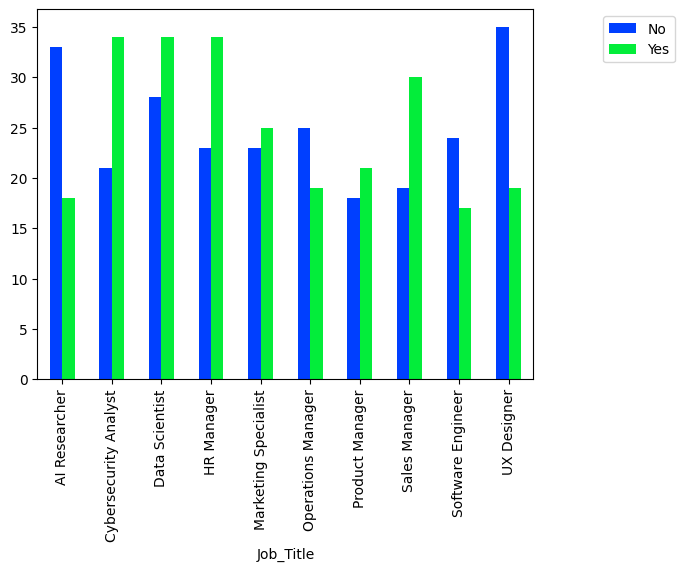

In [31]:
plt.style.use('seaborn-v0_8-bright')
plt.figure(figsize = (20,10))
cross_job_title_remote.T.plot(kind='bar' , width=0.5)
plt.legend(bbox_to_anchor = (1.3,1))
plt.show()


# Job_Title & Job_Growth_Projection

In [32]:
cross_job_title_growth = pd.crosstab(job.Job_Growth_Projection , job.Job_Title)
cross_job_title_growth

Job_Title,AI Researcher,Cybersecurity Analyst,Data Scientist,HR Manager,Marketing Specialist,Operations Manager,Product Manager,Sales Manager,Software Engineer,UX Designer
Job_Growth_Projection,,,,,,,,,,
Decline,16,19,23,22,23,7,10,16,12,21
Growth,20,14,22,14,11,19,15,19,16,19
Stable,15,22,17,21,14,18,14,14,13,14


In [33]:
for job_name in cross_job_title_growth.columns:
    iplot(px.pie(values = cross_job_title_growth[job_name],
                 title = f"({job_name}) ---> *{cross_job_title_growth[job_name].idxmax()}*" ,
                 names = cross_job_title_growth.index).update_traces(textinfo='label+percent'))

# Job_Title & Job_Growth_Projection & Industry

what is growth rate for each job in each industry ?

In [34]:
job_title_industry_group = job.groupby(['Job_Title' , 'Industry'])

In [35]:
for industry in job.Industry.unique():
    print(f"in **{industry}**")
    for job_name in job.Job_Title.unique():
        print(f" ({job_name}) ---> {job_title_industry_group.get_group((job_name , industry)).Job_Growth_Projection.value_counts().idxmax()}")
    print('\n')

in **Entertainment**
 (Cybersecurity Analyst) ---> Stable
 (Marketing Specialist) ---> Stable
 (AI Researcher) ---> Stable
 (Sales Manager) ---> Decline
 (UX Designer) ---> Decline
 (HR Manager) ---> Decline
 (Product Manager) ---> Growth
 (Software Engineer) ---> Growth
 (Data Scientist) ---> Decline
 (Operations Manager) ---> Growth


in **Technology**
 (Cybersecurity Analyst) ---> Stable
 (Marketing Specialist) ---> Decline
 (AI Researcher) ---> Growth
 (Sales Manager) ---> Decline
 (UX Designer) ---> Stable
 (HR Manager) ---> Decline
 (Product Manager) ---> Stable
 (Software Engineer) ---> Growth
 (Data Scientist) ---> Decline
 (Operations Manager) ---> Stable


in **Retail**
 (Cybersecurity Analyst) ---> Growth
 (Marketing Specialist) ---> Decline
 (AI Researcher) ---> Stable
 (Sales Manager) ---> Decline
 (UX Designer) ---> Stable
 (HR Manager) ---> Decline
 (Product Manager) ---> Growth
 (Software Engineer) ---> Stable
 (Data Scientist) ---> Stable
 (Operations Manager) ---> Sta

# Job_Title & Job_Growth_Projection & Location

what is growth rate for each job in each Location ?

In [36]:
job_title_location_group = job.groupby(['Job_Title' , 'Location'])

In [37]:
for location in job.Location.unique():
    print(f"in **{location}**")
    for job_name in job.Job_Title.unique():
        print(f" ({job_name}) ---> {job_title_location_group.get_group((job_name , location)).Job_Growth_Projection.value_counts().idxmax()}")
    print('\n')

in **Dubai**
 (Cybersecurity Analyst) ---> Decline
 (Marketing Specialist) ---> Decline
 (AI Researcher) ---> Stable
 (Sales Manager) ---> Growth
 (UX Designer) ---> Decline
 (HR Manager) ---> Growth
 (Product Manager) ---> Decline
 (Software Engineer) ---> Growth
 (Data Scientist) ---> Decline
 (Operations Manager) ---> Stable


in **Singapore**
 (Cybersecurity Analyst) ---> Decline
 (Marketing Specialist) ---> Decline
 (AI Researcher) ---> Growth
 (Sales Manager) ---> Decline
 (UX Designer) ---> Decline
 (HR Manager) ---> Growth
 (Product Manager) ---> Growth
 (Software Engineer) ---> Decline
 (Data Scientist) ---> Stable
 (Operations Manager) ---> Growth


in **Berlin**
 (Cybersecurity Analyst) ---> Stable
 (Marketing Specialist) ---> Decline
 (AI Researcher) ---> Growth
 (Sales Manager) ---> Stable
 (UX Designer) ---> Growth
 (HR Manager) ---> Decline
 (Product Manager) ---> Growth
 (Software Engineer) ---> Stable
 (Data Scientist) ---> Growth
 (Operations Manager) ---> Growth


in

# Job_Title & Location & Industry

what is job in-demand in each location for each industry ?

In [38]:
location_indusrty_group = job.groupby([job.Location , job.Industry])

In [39]:
for location in job.Location.unique():
    print(f"in **{location}**")
    for industry in job.Industry.unique():
        print(f" ({industry}) ---> {location_indusrty_group.get_group((location , industry)).Job_Title.unique().tolist()}")
    print('\n')

in **Dubai**
 (Entertainment) ---> ['Cybersecurity Analyst', 'Software Engineer', 'Data Scientist']
 (Technology) ---> ['Cybersecurity Analyst', 'Operations Manager', 'Software Engineer', 'Product Manager', 'Data Scientist']
 (Retail) ---> ['UX Designer', 'AI Researcher', 'Software Engineer', 'Marketing Specialist']
 (Education) ---> ['Operations Manager', 'Marketing Specialist', 'Software Engineer']
 (Finance) ---> ['UX Designer', 'AI Researcher', 'HR Manager']
 (Transportation) ---> ['Operations Manager', 'Cybersecurity Analyst', 'Product Manager', 'HR Manager']
 (Telecommunications) ---> ['Sales Manager', 'Cybersecurity Analyst', 'Data Scientist', 'UX Designer', 'HR Manager']
 (Manufacturing) ---> ['Data Scientist', 'UX Designer', 'Marketing Specialist']
 (Healthcare) ---> ['Sales Manager', 'AI Researcher', 'Operations Manager', 'Cybersecurity Analyst', 'UX Designer']
 (Energy) ---> ['UX Designer', 'Operations Manager', 'Software Engineer', 'Marketing Specialist', 'Cybersecurity Ana

# Job_Title & Salary_USD & Industry

what is salary for each job in each industy ?

In [40]:
job_title_industry_group = job.groupby(['Industry' , 'Job_Title'])
for industry in job.Industry.unique():
    for job_name in job.Job_Title.unique():
        print(f"Salary_USD in ({industry}) for ({job_name})")
        print(job_title_industry_group.get_group((industry,job_name)).Salary_USD.describe()[['mean' , 'min' , 'max']])
        print('-------------------------------\n')
    print('****************************************************\n****************************************************')

Salary_USD in (Entertainment) for (Cybersecurity Analyst)
mean     91567.603747
min      66782.590806
max     125455.823529
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Entertainment) for (Marketing Specialist)
mean     81401.753148
min      68323.783000
max     107067.728867
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Entertainment) for (AI Researcher)
mean    104512.728125
min      78902.565745
max     119754.540713
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Entertainment) for (Sales Manager)
mean    102609.673715
min      92037.214128
max     118957.228722
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Entertainment) for (UX Designer)
mean    71004.788654
min     35963.297317
max     89145.924106
Name: Salary_USD, dtype: float64
-------------------------------

Salary_USD in (Entertainment) for (HR Manager)
mean     93839.432751
min      68